### Binary Classification: Confusion Matrix

- Dataset: study_hours.csv
- Learning Date: 19-Oct-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Youtube: https://www.youtube.com/prasertcbs
    - Github: https://github.com/prasertcbs/

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# load csv data to a dataframe

df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv')
df.sample(10)

,Hours,Pass
8,2.25,1
15,4.25,1
0,0.50,0
12,3.25,1
3,1.25,0
5,1.75,0
10,2.75,1
7,2.00,0
2,1.00,0
18,5.00,1


/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py

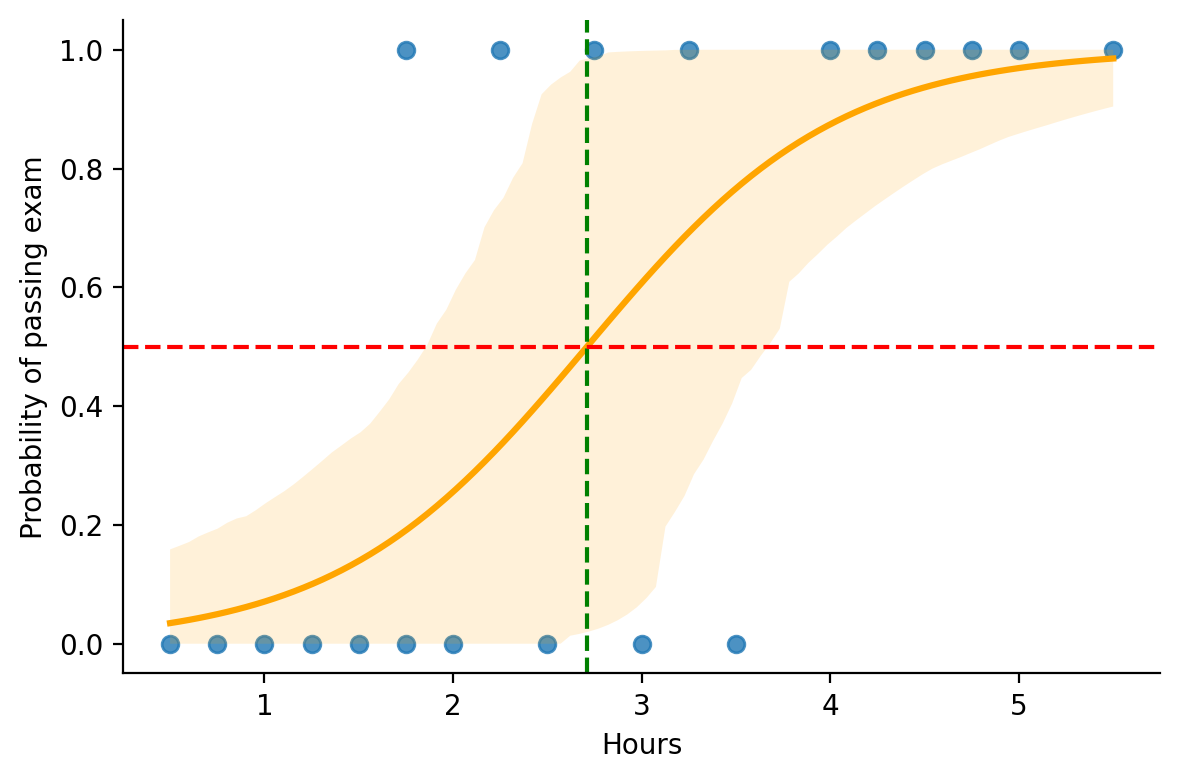

In [5]:
# plot

sns.lmplot(x = 'Hours', y = 'Pass', data = df, logistic = True, height = 4, aspect = 1.5, line_kws = {'color': 'orange'})
plt.ylabel('Probability of passing exam');
plt.axvline(2.71, color = 'green', linestyle = '--')
plt.axhline(.5, color = 'red', linestyle = '--');

### Scikit-learn: Logistic Regression

In [6]:
# import libraries

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.0


In [8]:
df.head(3)

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0


In [9]:
# apply all data point

X_train = df[['Hours']]
X_train.sample(5)

,Hours
11,3.00
15,4.25
8,2.25
9,2.50
7,2.00


In [10]:
type(X_train)

pandas.core.frame.DataFrame

In [11]:
y_train = df.Pass
y_train.sample(5)

2     0
12    1
8     1
13    0
3     0
Name: Pass, dtype: int64

In [12]:
type(y_train)

pandas.core.series.Series

In [13]:
lr = LogisticRegression() # create a model
# lr = LogisticRegression(C = 10e10) # minimize regularization
lr

LogisticRegression()

In [14]:
lr.fit(X_train, y_train) # train/fit a model

LogisticRegression()

In [15]:
lr.score(X_train, y_train) # get accuracy of the model

0.8

In [17]:
y_pred = lr.predict(X_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
y_train.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

### Confusion Matrix

In [20]:
from sklearn import metrics

# from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

In [21]:
X_train['Hours'].values

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ])

In [22]:
y_train.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
cm = confusion_matrix(y_train,y_pred)
cm

array([[8, 2],
       [2, 8]])

### scikit-learn: confusion matrix

![Screenshot 2566-10-19 at 20.39.51.png](<attachment:Screenshot 2566-10-19 at 20.39.51.png>)
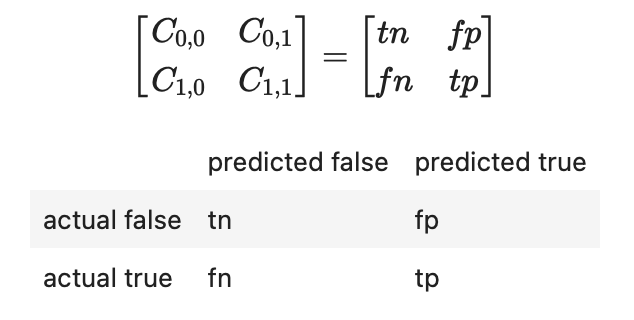

In [27]:
pd.crosstab(y_train, y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True, margins_name = 'Total')

Predicted,0,1,Total
Actual,,,
0,8,2,10
1,2,8,10
Total,10,10,20


In [28]:
dd = pd.DataFrame({'actual': y_train.values, 'predicted': y_pred})
dd

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,1,0
9,0,0


In [30]:
pd.crosstab(dd.actual, dd.predicted)

predicted,0,1
actual,,
0,8,2
1,2,8


In [31]:
metrics.confusion_matrix(y_train, y_pred)

array([[8, 2],
       [2, 8]])

In [32]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred), columns = ['pred_fail', 'pred_pass'], index = ['actual_fail', 'actual_pass'])

,pred_fail,pred_pass
actual_fail,8,2
actual_pass,2,8


In [33]:
# a function to create pretty confusion matrix

def pretty_confusion_matrix(cm_array):

    '''
    add labels and grand total to sklearn confusion matrix (2 x 2)
    '''
    df=pd.DataFrame(cm_array, columns = ['pred_fail', 'pred_pass'], index = ['actual_fail', 'actual_pass'])
    
    index_labels = df.index.tolist()
    df = df.append(df.sum(axis = 0), ignore_index = True)
    df.index = index_labels + ['total']
    df['total'] = df.sum(axis=1)
    return df

In [34]:
pretty_confusion_matrix(metrics.confusion_matrix(y_train, y_pred))

/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_43322/746267850.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df.sum(axis = 0), ignore_index = True)


,pred_fail,pred_pass,total
actual_fail,8,2,10
actual_pass,2,8,10
total,10,10,20


In [37]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp 

(8, 2, 2, 8)

![Screenshot 2566-10-19 at 20.47.32.png](<attachment:Screenshot 2566-10-19 at 20.47.32.png>)
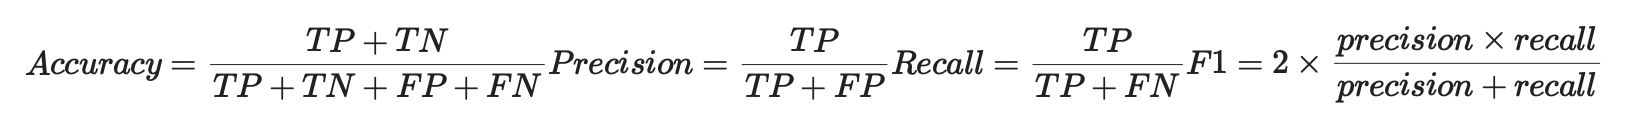

In [38]:
(tp + tn)/(tp + tn + fp + fn) # accuracy score

0.8

In [39]:
metrics.accuracy_score(y_train, y_pred)

0.8

In [40]:
metrics.precision_score(y_train, y_pred)

0.8

In [41]:
tp/(tp + fp) # precision score

0.8

In [42]:
metrics.recall_score(y_train, y_pred)

0.8

In [43]:
tp/(tp + fn) # recall score

0.8

In [44]:
metrics.f1_score(y_train, y_pred)

0.8000000000000002

In [45]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



In [46]:
tn/(tn + fn) # precision (class = 0)

0.8

In [47]:
tn/(tn + fp) # recall (class = 0)

0.8